In [1]:
import sys
sys.path.append("../../src")
from pylab import plt
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import torch
from active_learning.vaal.model import VAE
from utils.plot_functions import set_style, set_size

os.chdir("../..")
os.getcwd()

'c:\\Users\\jonas\\OneDrive - Danmarks Tekniske Universitet\\KID\\7. Semester\\Bachelor Projekt\\Bachelorproject'

c:\Users\jonas\OneDrive - Danmarks Tekniske Universitet\KID\7. Semester\Bachelor Projekt\Bachelorproject\notebooks\Data_processing\../../src\active_learning\vaal\model.py:155: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  init.kaiming_normal(m.weight)


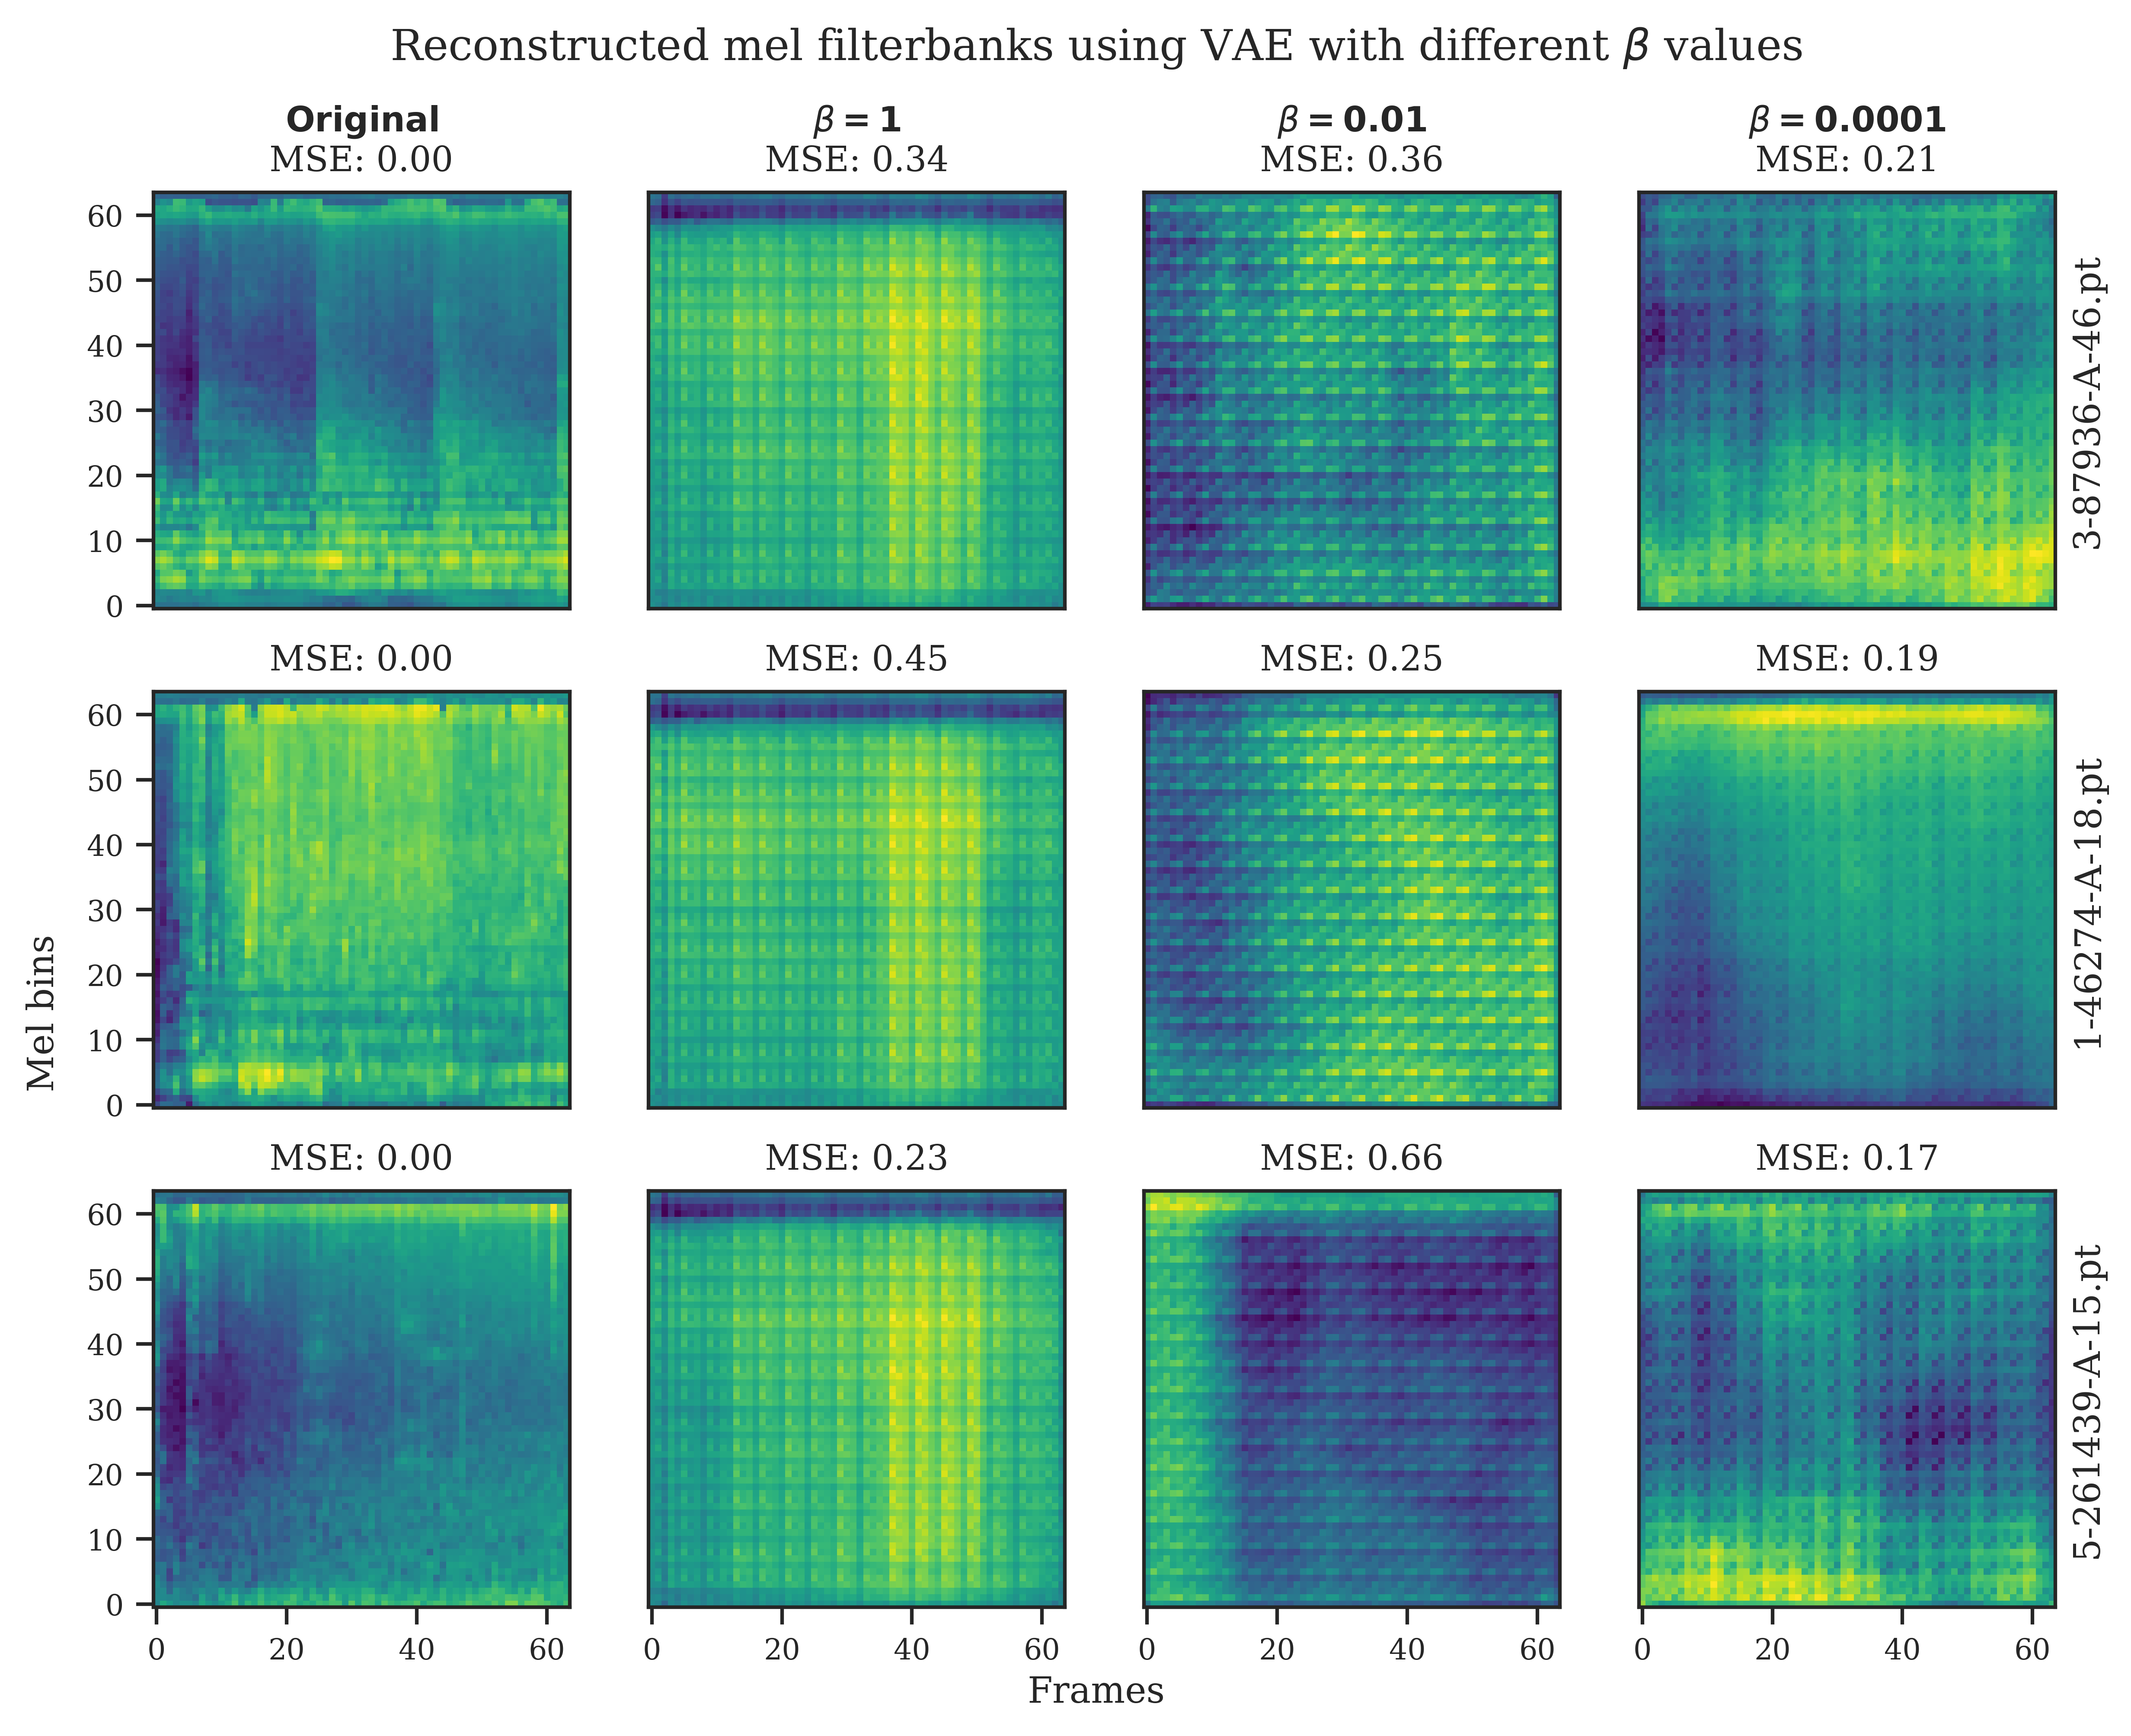

In [31]:
import torch.nn as nn
mse_loss = nn.MSELoss()

model_dir = "models/VAE"
vae = VAE(z_dim=32, multiplier=2)
vae.load_state_dict(torch.load(os.path.join(model_dir, "vae_1.pt")))
vae.eval()

vae_e2 = VAE(z_dim=32, multiplier=2)
vae_e2.load_state_dict(torch.load(os.path.join(model_dir, "vae_001.pt")))
vae_e2.eval()

vae_e4 = VAE(z_dim=32, multiplier=2)
vae_e4.load_state_dict(torch.load(os.path.join(model_dir, "vae_e4_norm.pt")))
vae_e4.eval()

path_to_data = "data/processed/ESC50"
resolution = "train_64x64"
titles = ['Original', r'\bf{$', r'\bf{$', r'\bf{$\beta$=1e-4$']
titles = [
    r"$\bf{" + 'Original'  + "}$",
    r'$\beta$' + r"$\bf{" + '=1'  + "}$",
    r'$\beta$' + r"$\bf{" + r'=0.01'  + "}$",
    r'$\beta$' + r"$\bf{" + r'=0.0001'  + "}$"]

# Make specs:
specs=[]
recons=[]
filenames=["3-87936-A-46.pt", "1-46274-A-18.pt", "5-261439-A-15.pt"]
for file_name in filenames:
    file_path = os.path.join(*[path_to_data, resolution, file_name])

    spec1 = torch.load(file_path)
    spec1 = spec1[None, :, :]
    recons+=[0]
    spec2, _, _, _ = vae(spec1)
    recons+=[mse_loss(spec2, spec1)] 
    spec2=spec2.detach().numpy()
    spec3, _, _, _ = vae_e2(spec1)
    recons+=[mse_loss(spec3, spec1)] 
    spec3=spec3.detach().numpy() 
    spec4, _, _, _ = vae_e4(spec1)
    recons+=[mse_loss(spec4, spec1)] 
    spec4=spec4.detach().numpy() 
    specs+=[spec1, spec2, spec3, spec4]
    

set_style()
fig, axes = plt.subplots(3,4, figsize=(set_size("project", fraction=1.3, height_ratio=1.3)))

i=0
for spec, ax in zip(specs, axes.ravel()):
    im = ax.imshow(spec.T, origin='lower', aspect='equal', cmap="viridis")
    if 0 < i < 4:
        ax.set_title("{}\nMSE: {:.2f}".format(titles[i], recons[i]))
    elif i == 0:
        ax.set_title("{}\n ".format(titles[i]))
    else:
        ax.set_title("MSE: {:.2f}".format(recons[i]))
    ax.grid(False)
    #ax.axis('off')
    ax.yaxis.set_label_position("right")

    if ((i+4) % 4) == 0:
        ax.axes.yaxis.set_visible(True)
        ax.set_title("")
    else: 
        ax.axes.get_yaxis().set_ticks([])

    if i > 7:
        ax.axes.xaxis.set_visible(True)
    else: 
        ax.axes.get_xaxis().set_ticks([])

    if ((i+1) % 4) == 0:
        ax.set_ylabel(filenames[int(i/4)])
    i += 1
first=False
fig.suptitle(r"Reconstructed mel filterbanks using VAE with different $\beta$ values")
fig.text(0.5, -0.005, 'Frames', ha='center')
fig.text(-0.005, 0.4, 'Mel bins', va='center', rotation='vertical')
plt.tight_layout()
plt.savefig(f"docs/Filterbank_plots/vae_comparison.png", bbox_inches = 'tight')
plt.savefig(f"docs/Filterbank_plots/vae_comparison.eps", bbox_inches = 'tight')
